# Assignment : Collaboration - Kaggle Part III 

The dataset we used from Kaggle is "***Lending Club Loan Data***"(, which contains complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others. The file is a matrix of about 890 thousand observations and 75 variables.

We will focus on all of the "Charged off" loans listed in this dataset, and analyze the loan purpose and loan grade of those charged off loans.

In [1]:
import pandas as pd
import sqlite3
conn = sqlite3.connect("database.sqlite")
charged_off_loan = pd.read_sql_query("SELECT * From loan WHERE loan_status = 'Charged Off'",conn)

After the process listed above, we now obtain the dataset of all charged_off_loan, we could check the format and some characteristics of this new dataset.

In [2]:
charged_off_loan.head()

,index,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,...,None,None,None,None,None,None,NaN,None,None,None
1,8,1071795,1306957.0,5600.0,5600.0,5600.0,60 months,21.28%,152.39,F,...,None,None,None,None,None,None,NaN,None,None,None
2,9,1071570,1306721.0,5375.0,5375.0,5350.0,60 months,12.69%,121.45,B,...,None,None,None,None,None,None,NaN,None,None,None
3,12,1064687,1298717.0,9000.0,9000.0,9000.0,36 months,13.49%,305.38,C,...,None,None,None,None,None,None,NaN,None,None,None
4,14,1069057,1303503.0,10000.0,10000.0,10000.0,36 months,10.65%,325.74,B,...,None,None,None,None,None,None,NaN,None,None,None


In [3]:
charged_off_loan.describe()

,index,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,45248.000000,4.524800e+04,45248.000000,45248.000000,45248.000000,45248.000000,4.524800e+04,45248.000000,45248.000000,45248.000000,...,45248.000000,45248.000000,45248.000000,45242.000000,8754.000000,45248.0,45248.000000,35229.000000,3.522900e+04,3.522900e+04
mean,119117.900592,1.228375e+07,14556.293096,14510.749094,14390.422897,440.787464,6.508513e+04,18.403126,0.276056,0.983624,...,890.805156,93.663741,454.690175,0.008068,42.618689,1.0,0.003912,133.869114,1.144548e+05,2.636858e+04
std,87770.135984,1.279851e+07,8393.421467,8366.823080,8391.872213,247.012035,5.697144e+04,7.939290,0.791679,1.128111,...,1573.941565,256.002276,656.652819,0.094972,21.800386,0.0,0.070722,1316.084382,1.276264e+05,2.538069e+04
min,1.000000,8.035300e+04,900.000000,900.000000,0.000000,21.620000,4.080000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,45555.750000,1.824480e+06,8000.000000,8000.000000,8000.000000,265.175000,4.000000e+04,12.570000,0.000000,0.000000,...,0.000000,0.000000,235.830000,0.000000,25.000000,1.0,0.000000,0.000000,2.567000e+04,1.240000e+04
50%,112831.500000,8.047168e+06,12675.000000,12600.000000,12375.000000,390.830000,5.600000e+04,18.350000,0.000000,1.000000,...,35.055000,1.070000,374.985000,0.000000,42.000000,1.0,0.000000,0.000000,5.973800e+04,2.050000e+04
75%,168119.250000,1.674259e+07,20000.000000,20000.000000,19975.000000,573.320000,7.800000e+04,24.092500,0.000000,2.000000,...,1259.550000,26.640550,568.552500,0.000000,60.000000,1.0,0.000000,0.000000,1.725730e+05,3.320000e+04
max,421087.000000,6.453775e+07,35000.000000,35000.000000,35000.000000,1424.570000,8.706582e+06,39.980000,18.000000,8.000000,...,33520.270000,7002.190000,34833.350000,4.000000,152.000000,1.0,5.000000,95806.000000,3.437283e+06,1.998700e+06


Then we start analyze some properties of those charged off loans, we mainly focus on the loan purpose and the loan grade.

In [4]:
loan_purpose = charged_off_loan['purpose'].value_counts()

In [5]:
loan_purpose

debt_consolidation    27599
credit_card            7826
other                  2936
home_improvement       2269
small_business         1371
major_purchase          874
medical                 569
car                     448
moving                  425
house                   286
vacation                270
wedding                 265
educational              56
renewable_energy         54
Name: purpose, dtype: int64

In [7]:
import matplotlib.pyplot as plot
import matplotlib.mlab as mlab
import matplotlib.dates as dates

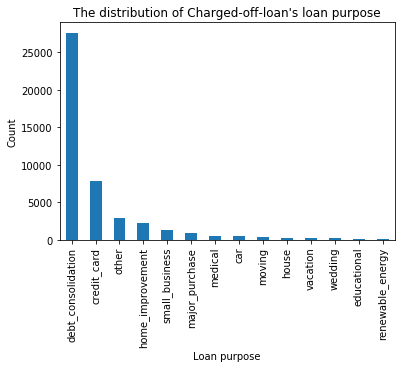

In [9]:
loan_purpose.plot("bar")
plot.xlabel("Loan purpose")
plot.ylabel("Count")
plot.title("The distribution of Charged-off-loan's loan purpose")
plot.show()

This bar graph shows the distribution of the loan purpose of those charged off loans, we find the "debt consolidation" is the main loan purpose of those charged off loan, which means lending club should be careful when the borrowers'purpose of applying loan is debt consolidation. 

In [10]:
loan_grade = charged_off_loan['grade'].value_counts()

In [11]:
loan_grade

C    12642
D    10486
B     9519
E     6258
F     2934
A     2617
G      792
Name: grade, dtype: int64

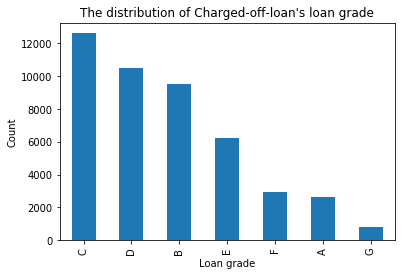

In [12]:
loan_grade.plot("bar")
plot.xlabel("Loan grade")
plot.ylabel("Count")
plot.title("The distribution of Charged-off-loan's loan grade")
plot.show()

This bar graph shows the distribution of the loan grade of those charged off loans, we find the loans graded with 'C' are much more likely to default, which means lending club should be careful when they estimate the loan application with grade 'C'.